# 数据思维案例 

## 新冠肺炎求助患者数据画像

本案例以赵小曼、范举等人在2020年新冠肺炎疫情早期针对社交网络上求助患者的研究报告 **<a href="https://mp.weixin.qq.com/s/0mB03Zp0jaI9uOdx5cbCkg">“1183位求助者的数据画像：不是弱者，而是你我”</a>** 为基础，目的是展示__以数据为中心的问题求解__的主要流程。

几点说明：
1. 本案例的侧重是如何探索数据而非建立模型，因此更多关注的是探索式数据分析与可视化，而对统计建模、机器学习等内容较少涉及。
2. 本案例对原研究报告的数据做了匿名处理，并对数据采集、清洗等步骤做了一定的简化，以求更聚焦到数据分析部分。

## 下面正式进入案例！
注意：原始的求助者微博数据`weibo_sos.xlsx`可以通过以下代码解压获取，解压密码请联系范举（fanj@ruc.edu.cn）


### 导入微博求助数据

In [1]:
import pandas as pd
import numpy as np
import zipfile

zfile = zipfile.ZipFile('./weibo_sos.zip','r')

pswd = ''

try:
    for names in zfile.namelist():
        zfile.extract(names,path='./', pwd = bytes(pswd, 'utf-8'))
except Exception as e:
    raise
    
weibo = pd.read_excel('weibo_sos.xlsx')
weibo.head()

,name,age,city,addr,loc,jiedao,quyu,year,est_price,user,pubdate,pubtime,quanwen,biaoti,user_gender,user_province,user_city
0,419,54.0,湖北武汉,长山社区,东湖高新区 万科嘉园光谷的光,华科大,东湖高新,2007.0,20192.0,567.0,2020/2/17,0 days 12:09:09.000000000,NaN,卵巢肿瘤晚期，春节前已完成一个疗程的化?,男,北京,未知
1,419,50.0,湖北武汉,长山社区,东湖高新区 万科嘉园光谷的光,华科大,东湖高新,2007.0,20192.0,1443.0,2020/2/17,0 days 10:09:54.000000000,NaN,卵巢肿瘤晚期，春节前已完成一个疗程的化疗?,女,其他,不限
2,218,74.0,武汉市洪山区,东湖御院 红星社区,东湖高新区 东湖御院,光谷广场,东湖高新,2015.0,25957.0,1874.0,2020/2/13,0 days 23:44:23.000000000,NaN,为肾衰透析病人，原透析医院为湖北省中医院光谷院区，1月31日有发?,男,其他,不限
3,1240,46.0,武汉,云顶居，清水源社区,东湖高新区 云顶居,民族大道,东湖高新,2003.0,17310.0,43.0,2020/2/4,0 days 21:58:34.000000000,，51岁，9个月前同济肾移植时有肺部并发症。冬季流感多发，1月15日发烧，按主治医生要求吃感...,，51岁，9个月前同济肾移植时有肺部并发症。冬季?,男,未知,未知
4,1240,52.0,武汉,云顶居，清水源社区,东湖高新区 云顶居,民族大道,东湖高新,2003.0,17310.0,43.0,2020/2/5,0 days 14:23:47.000000000,NaN,，51岁，9个月前肾移植时有肺部并发症。冬季流感多发，1月15日发烧，吃?,男,未知,未知


### 问题1：求助者微博帖子的数量随着日期是如何变化的？
* 利用pandas建立数据透视表pivot table（回顾一下：Excel中也有类似概念）

In [2]:
weibo["pubdate"] = pd.to_datetime(weibo["pubdate"])  # 字符串类型转换成日期时间类型
weibo["pubdate"] = weibo["pubdate"].apply(lambda x : x.strftime('%Y-%m-%d')) # 提取日期字符串信息

# 创建一个数据透视表
pivot_date_post_count = pd.pivot_table(
    weibo, index='pubdate',
    values='name', aggfunc=np.count_nonzero)

pivot_date_post_count.sort_index()

pivot_date_post_count.head()

,name
pubdate,
2020-02-03,1
2020-02-04,144
2020-02-05,496
2020-02-06,639
2020-02-07,567


* 利用seaborn工具绘制简单的柱状图

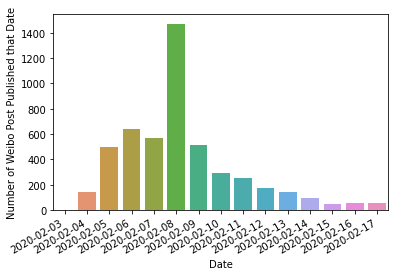

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=pivot_date_post_count.index, y=pivot_date_post_count['name'], data=pivot_date_post_count)
plt.xlabel('Date')
plt.ylabel('Number of Weibo Post Published that Date')
plt.gcf().autofmt_xdate() #自动适应坐标轴标签

### 问题2：不同的求助者是否对应着相似数量的微博帖子？

In [4]:
name_counts = pd.value_counts(weibo['name'])
name_counts.head(20)

899     511
862     511
631     121
24       49
263      45
141      28
624      27
957      27
962      24
766      24
941      20
1151     19
622      19
682      18
716      18
609      17
1381     16
1296     15
484      15
200      14
Name: name, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

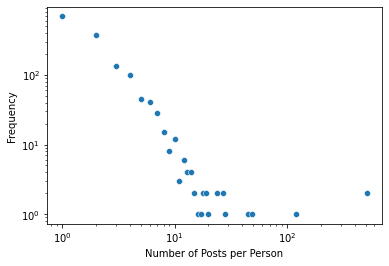

In [5]:
post_dist = pd.value_counts(name_counts)
sns.scatterplot(post_dist.index, post_dist)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Posts per Person')
plt.ylabel('Frequency')


In [6]:
patient_post = weibo[weibo.name==899]
patient_post

,name,age,city,addr,loc,jiedao,quyu,year,est_price,user,pubdate,pubtime,quanwen,biaoti,user_gender,user_province,user_city
3116,899,72.0,武汉,硚口区汉口,硚口区 汉口人家,古田,硚口,2005.0,17588.0,552.0,2020-02-08,0 days 22:28:28.000000000,和分别于21号和22号出现新冠症状，在家隔离观察两天后越发严重寻求治疗，但医院爆满27号才做...,#肺炎患者求助[超话]#【年龄】71岁，43岁【所在城市】,男,其他,不限
3120,899,73.0,武汉,硚口区汉口春天11栋,硚口区 汉口春天,古田,硚口,2007.0,17848.0,655.0,2020-02-08,0 days 22:39:12.000000000,和分别于21号和22号出现新冠症状，在家隔离观察两天后越发严重寻求治疗，但医院爆满27号才做...,NaN,女,河南,洛阳
3121,899,70.0,武汉,硚口区汉口春天11栋,硚口区 汉口春天,古田,硚口,2007.0,17848.0,655.0,2020-02-08,0 days 22:34:09.000000000,和分别于21号和22号出现新冠症状，在家隔离观察两天后越发严重寻求治疗，但医院爆满27号才做...,和分别于21?,女,河南,洛阳
3122,899,73.0,武汉,硚口区汉口春天11栋,硚口区 汉口春天,古田,硚口,2007.0,17848.0,1462.0,2020-02-08,0 days 22:25:37.000000000,和分别于21号和22号出现新冠症状，在家隔离观察两天后越发严重寻求治疗，但医院爆满27号才做...,NaN,女,山东,泰安
3123,899,71.0,武汉,硚口区汉口春天11栋,硚口区 汉口春天,古田,硚口,2007.0,17848.0,655.0,2020-02-08,0 days 22:40:58.000000000,和分别于21号和22号出现新冠症状，在家隔离观察两天后越发严重寻求治疗，但医院爆满27号才做...,NaN,女,河南,洛阳
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,899,73.0,武汉,硚口区汉口春天11栋,硚口区 汉口春天,古田,硚口,2007.0,17848.0,945.0,2020-02-08,0 days 22:23:38.000000000,和分别于21号和22号出现新冠症状，在家隔离观察两天后越发严重寻求治疗，但医院爆满27号才做...,和分别于21?,女,河南,洛阳
3626,899,74.0,武汉,硚口区汉口春天11橦4单元,硚口区 汉口春天,古田,硚口,2007.0,17848.0,1584.0,2020-02-08,0 days 21:35:17.000000000,NaN,【年龄】7?,女,广东,未知
3627,899,71.0,武汉,硚口区汉口春天11栋,硚口区 汉口春天,古田,硚口,2007.0,17848.0,164.0,2020-02-09,0 days 00:04:09.000000000,和分别于21号和22号出现新冠症状，在家隔离观察两天后越发严重寻求治疗，但医院爆满27号才做...,?,男,其他,不限
3628,899,72.0,武汉,硚口区汉口春天11栋,硚口区 汉口春天,古田,硚口,2007.0,17848.0,1875.0,2020-02-09,0 days 07:41:38.000000000,NaN,【年龄】71岁，43岁【所在城市】【患?,女,其他,不限


In [7]:
patient_post.iloc[0]['quanwen']

'和分别于21号和22号出现新冠症状，在家隔离观察两天后越发严重寻求治疗，但医院爆满27号才做检查，CT显示肺部感染，因没有床位医生让回家隔离！之后病情恶化出现呼吸困难，呕吐，胸疼，拉肚子，分别去协和西院，一医院，四医院寻求确诊治疗及住院，均被打发回家自行隔离，情况时好时坏！老人于2.7日再次在普爱医院CT检测已双肺严重感染，病情也是继续再恶化，呼吸困难，食欲不振，恶心拉肚子！还是不给确诊，让回家隔离！症状更加严重，7日晚出现高烧！情况十分严重！望给予救助！救命之恩，永生难忘！我们2人急需住院治疗，家中还有2位大人近距离照顾他们需要隔离观察。在此叩谢！'

In [8]:
patient_post = weibo[weibo.name==631]
patient_post

,name,age,city,addr,loc,jiedao,quyu,year,est_price,user,pubdate,pubtime,quanwen,biaoti,user_gender,user_province,user_city
263,631,77.0,湖北省武汉市武昌区,武珞路343号,十五中,中南丁字桥,武昌,NaN,0.0,66.0,2020-02-06,0 days 08:22:59.000000000,NaN,女儿在一月三十号因感染去世，七十七岁的和七十二岁的?,女,湖北,未知
264,631,77.0,武汉,武珞路343号,十五中,中南丁字桥,武昌,NaN,0.0,1610.0,2020-02-06,0 days 06:45:02.000000000,两位身患肺炎的高龄老人在家中看着同患肺炎的女儿去世，现在已没办法照顾同患肺炎的13岁孙女。,两位身患肺炎的高龄老人在家中看着同患肺炎的女儿去世，现在已没?,女,四川,成都
265,631,78.0,河北省武汉市,武珞路343号,十五中,中南丁字桥,武昌,NaN,0.0,1777.0,2020-02-06,0 days 11:27:07.000000000,NaN,女儿因这次疫情刚?,女,其他,不限
266,631,76.0,武汉市武昌区,武珞路343号,十五中,中南丁字桥,武昌,NaN,0.0,397.0,2020-02-06,0 days 00:50:48.000000000,女儿因这次疫情刚刚去世，她从1月22号开始发病，医院诊断为肺炎。因排不到试剂盒，病情加重后一...,NaN,男,西藏,林芝
267,631,74.0,武汉市武昌区,武珞路343号,十五中,中南丁字桥,武昌,NaN,0.0,2345.0,2020-02-06,0 days 11:46:26.000000000,NaN,NaN,女,福建,未知
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,631,77.0,武汉,武汉市武昌区武珞路343号,武昌区 十五中学,武珞路343号,武昌,NaN,0.0,1152.0,2020-02-07,0 days 00:47:36.000000000,本人，，77岁；妻子，，72岁；外孙女，，13岁。目前，我，我妻子，外孙女均已感染，妻子最严...,NaN,女,其他,不限
517,631,74.0,武汉市武昌区,武汉市武昌区武珞路343号,武昌区 十五中学,武珞路343号,武昌,NaN,0.0,1710.0,2020-02-07,0 days 00:16:54.000000000,NaN,NaN,女,其他,不限
518,631,73.0,武汉,武汉市武昌区武珞路343号,武昌区 十五中学,武珞路343号,武昌,NaN,0.0,1953.0,2020-02-07,0 days 01:20:21.000000000,女儿因这次疫情刚刚去世，她从1月22号开始发病，医院诊断为肺炎。因排不到试剂盒，病情加重后一...,NaN,女,安徽,合肥
563,631,79.0,武汉,武珞路十五中,武昌区 十五中教委宿舍,中南丁字桥,武昌,1995.0,0.0,1938.0,2020-02-06,0 days 09:59:40.000000000,NaN,?,男,湖北,未知


In [9]:
patient_post.iloc[3]['quanwen']

'女儿因这次疫情刚刚去世，她从1月22号开始发病，医院诊断为肺炎。因排不到试剂盒，病情加重后一直得不到救治，各个医院均以没有床位拒收，最后1月30号在我家去世。密切接触者有我们同住的3人：本人，，77岁；妻子，，72岁；外孙女，，13岁。目前，我，我妻子，外孙女均已感染，妻子最严重，诊断资料均附上。我儿子当前在一线忙的不得了，在焚烧这次疫情产生的医用垃圾工厂加班加点工作，根本顾不上我们了。这是为了战胜这次疫情，我都能理解！可是现在我和妻子是13岁的外孙女唯一的亲人和监护人（她爸爸在离婚后消失了），我的妻子已双肺感染，我和外孙女也单肺感染。女儿因得不到正常治疗而在家离世，我们被迫相互感染，悲愤难平！我们两位高龄老人在这种情况下如何抚养这个孩子?万般绝望！急切请求为这个13岁的孩子住院治疗保命！'

In [10]:
pd.value_counts(patient_post['age'])

77.0    23
78.0    21
75.0    20
76.0    18
79.0    15
74.0     7
73.0     7
81.0     3
80.0     2
72.0     2
82.0     1
Name: age, dtype: int64

## 数据清洗与合并
1. 为了简化案例展示，此处省略了数据清洗的内容。
2. 此处的数据合并**非常重要**! 4k+ 的微博中实际含有 1k+ 求助者，后续分析基于求助者。
    1. 简单起见，约定使用 ```求助者姓名``` 为依据
    2. 合并时，各列保留尽可能多的信息（因为不同微博转发内容长度可能不同）

In [11]:
from operator import itemgetter

def majority_voting (vals):
    vc = pd.value_counts(vals)
    vc = dict(zip(vc.index.tolist(), vc.values.tolist()))
    sorted_vc = sorted(vc.items(), key=itemgetter(1), reverse=True)
    for t in sorted_vc:
        if t[0] !='':
            return t[0]
    return 'NIL'

def consolidate_quanwen(vals):
    l1 = []
    l2 = []
    for i in range(0, len(vals)):
        l1.append(i)
        l2.append(len(str(vals[i])))
    vc = dict(zip(l1, l2))
    sorted_vc = sorted(vc.items(), key=itemgetter(1), reverse=True)
    for t in sorted_vc:
        if vals[t[0]] !='':
            return vals[t[0]]
    return 'NIL'

namelist = weibo['name'].unique()
cols = ['name','age','city',\
        'loc','jiedao','quyu','year','est_price',
        'biaoti','quanwen']

patients = pd.DataFrame(columns = cols)
# consolidation for each unique name

for name in namelist:
    df = weibo.loc[weibo['name'] == name]
    data = [name]
    # consolidate age, city, addr
    age = majority_voting(df['age'].values.tolist())
    data.append(age)
    city = majority_voting(df['city'].values.tolist())
    data.append(city)
    loc = majority_voting(df['loc'].values.tolist())
    data.append(loc)
    jiedao = majority_voting(df['jiedao'].values.tolist())
    data.append(jiedao)
    quyu = majority_voting(df['quyu'].values.tolist())
    data.append(quyu)
    year = majority_voting(df['year'].values.tolist())
    data.append(year)
    est_price = majority_voting(df['est_price'].values.tolist())
    data.append(est_price)
    
    # consolidate biaoti, quanwen
    biaoti = consolidate_quanwen(df['biaoti'].values.tolist())
    data.append(biaoti)
    quanwen = consolidate_quanwen(df['quanwen'].values.tolist())
    data.append(quanwen)
    
    row = pd.DataFrame([data], columns = cols)
    patients = patients.append(row, ignore_index = True)

patients

,name,age,city,loc,jiedao,quyu,year,est_price,biaoti,quanwen
0,419,54.0,湖北武汉,东湖高新区 万科嘉园光谷的光,华科大,东湖高新,2007.0,20192.0,卵巢肿瘤晚期，春节前已完成一个疗程的化疗?,NaN
1,218,74.0,武汉市洪山区,东湖高新区 东湖御院,光谷广场,东湖高新,2015.0,25957.0,为肾衰透析病人，原透析医院为湖北省中医院光谷院区，1月31日有发?,NaN
2,1240,52.0,武汉,东湖高新区 云顶居,民族大道,东湖高新,2003.0,17310.0,，51岁，9个月前肾移植时有肺部并发症。冬季流感多发，1月15日发烧，吃?,，51岁，9个月前同济肾移植时有肺部并发症。冬季流感多发，1月15日发烧，按主治医生要求吃感...
3,1201,32.0,湖北省武汉市,东湖高新区 保利时代,民族大道,东湖高新,2013.0,27014.0,，36岁，华中科技大学电信系04级校友，华为武研所的员工。他是我?,，36岁，华中科技大学电信系04级校友，华为武研所的员工。他是我大学最好的朋友，在我的认识里...
4,974,64.0,湖北省武汉市,东湖高新区 保利时代,民族大道,东湖高新,2013.0,27014.0,我亲哥哥在，目前持续高烧不退，呼吸困难?,我亲哥哥在，目前持续高烧不退，呼吸困难，三天无法进食，2月5日CT显示已双肺感染，有毛玻璃状...
...,...,...,...,...,...,...,...,...,...,...
1480,1332,71.0,武昌区,福星惠誉国际城三期,NIL,NIL,NIL,NIL,NaN,NaN
1481,1001,68.0,武昌区,福星惠誉国际城三期,NIL,NIL,NIL,NIL,NaN,NaN
1482,614,60.0,湖北省武汉市青山区园林路,青山区 大华滨江天地三期铂金瑞府,青山,青山,2009.0,22575.0,我是发起求助的人，我?,我是发起求助的人，我是个怀孕19周的孕妇，现家里居住着两位老人，婆婆中风多年，还有我们我们小...
1483,810,30.0,湖北省武汉市青山区园林路,青山区 大华滨江天地三期铂金瑞府,青山,青山,2009.0,22575.0,我是发起求助的人，我?,我是发起求助的人，我是个怀孕19周的孕妇，现家里居住着两位老人，婆婆中风多年，还有我们我们小...


In [12]:
patients = patients[patients['quyu'] != 'NIL']
patients

,name,age,city,loc,jiedao,quyu,year,est_price,biaoti,quanwen
0,419,54.0,湖北武汉,东湖高新区 万科嘉园光谷的光,华科大,东湖高新,2007.0,20192.0,卵巢肿瘤晚期，春节前已完成一个疗程的化疗?,NaN
1,218,74.0,武汉市洪山区,东湖高新区 东湖御院,光谷广场,东湖高新,2015.0,25957.0,为肾衰透析病人，原透析医院为湖北省中医院光谷院区，1月31日有发?,NaN
2,1240,52.0,武汉,东湖高新区 云顶居,民族大道,东湖高新,2003.0,17310.0,，51岁，9个月前肾移植时有肺部并发症。冬季流感多发，1月15日发烧，吃?,，51岁，9个月前同济肾移植时有肺部并发症。冬季流感多发，1月15日发烧，按主治医生要求吃感...
3,1201,32.0,湖北省武汉市,东湖高新区 保利时代,民族大道,东湖高新,2013.0,27014.0,，36岁，华中科技大学电信系04级校友，华为武研所的员工。他是我?,，36岁，华中科技大学电信系04级校友，华为武研所的员工。他是我大学最好的朋友，在我的认识里...
4,974,64.0,湖北省武汉市,东湖高新区 保利时代,民族大道,东湖高新,2013.0,27014.0,我亲哥哥在，目前持续高烧不退，呼吸困难?,我亲哥哥在，目前持续高烧不退，呼吸困难，三天无法进食，2月5日CT显示已双肺感染，有毛玻璃状...
...,...,...,...,...,...,...,...,...,...,...
1478,28,68.0,湖北省武汉市,硚口区 香港映象,古田,硚口,2006.0,19204.0,父亲有心脏病和糖尿病，属于重症病人。2月1日父母感觉身体不适，咳?,父亲有心脏病和糖尿病，属于重症病人。2月1日父母感觉身体不适，咳嗽，乏力，低烧，自行吃药，无...
1479,545,67.0,湖北省武汉市,硚口区 香港映象,古田,硚口,2006.0,19204.0,父亲有心脏病和糖尿病，属于重症病人。2月1日父母感觉身体不适，咳?,父亲有心脏病和糖尿病，属于重症病人。2月1日父母感觉身体不适，咳嗽，乏力，低烧，自行吃药，无...
1482,614,60.0,湖北省武汉市青山区园林路,青山区 大华滨江天地三期铂金瑞府,青山,青山,2009.0,22575.0,我是发起求助的人，我?,我是发起求助的人，我是个怀孕19周的孕妇，现家里居住着两位老人，婆婆中风多年，还有我们我们小...
1483,810,30.0,湖北省武汉市青山区园林路,青山区 大华滨江天地三期铂金瑞府,青山,青山,2009.0,22575.0,我是发起求助的人，我?,我是发起求助的人，我是个怀孕19周的孕妇，现家里居住着两位老人，婆婆中风多年，还有我们我们小...


### 问题3：求助者的年龄呈现什么分布？

Text(0, 0.5, 'Number of Patients in that Age Group')

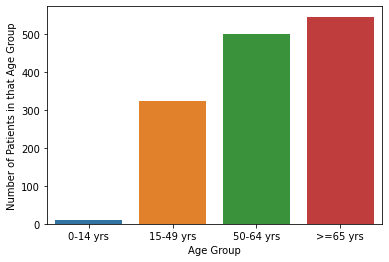

In [13]:
df = patients[patients.age != 'NIL']

sections = [-1,14,49,64,150]
group_names = ['0-14 yrs','15-49 yrs','50-64 yrs','>=65 yrs']
cuts = pd.cut(df['age'],sections,labels=group_names)
age_counts = pd.value_counts(cuts)
df = pd.DataFrame({'age_group': age_counts.index, 'number': age_counts})

sns.barplot(x='age_group', y='number', data=df)
plt.xlabel('Age Group')
plt.ylabel('Number of Patients in that Age Group')

### 问题4：求助者的求助内容中频繁出现的词是什么？  
        
1. 删除：冗余的停用词， 如 '武汉'   
2. 合并：合并一些语义近似的词，如'父亲' 和 '爸爸' 
3. 展示： 回执词云图     

* 文本数据的预处理：分词、去重停用词、合并同义词

In [14]:
import jieba

def word_cut (texts, sw_path):
    words_list = []
    word_generator = jieba.cut(texts, cut_all=False)  # 返回的是一个迭代器
    with open(sw_path) as f:
        str_text = f.read()
    for word in word_generator:
        if word.strip() not in str_text:
            #if re.match('[a-zA-z\d]+',word.strip()) == None:
            if word == '父母' or word == '爸妈' or word == '爸爸妈妈' or word == '双亲' or word == '父母亲' or word == '老亲' or word == '岳父母':
                word = '父母'
            if word == '妈妈' or word == '我妈' or word == '母亲' or word == '岳母' or word == '婆婆' or word == '老妈' or word == '丈母娘' or word == '公婆':
                word = '母亲'
            if word == '爸爸' or word == '我爸' or word == '父亲' or word == '岳父' or word == '公公' or word == '老父亲' or word == '爹爹' or word == '公爹' or word == '我父':
                word = '父亲'
            if word == '外公' or word == '爷爷' or word == '爷以':
                word = '爷爷'
            if word == '外婆' or word == '奶奶':
                word = '奶奶'
            if word == '姑姑' or word == '姑妈' or word == '舅妈' or word == '小姨' or word == '姨妈' or word == '阿姨' or word == '大姨' or word == '伯母' or word == '姨妈家' or word == '婶婶' or word == '婶子' or word == '大妈' or word == '大姑' or word == '姑娘' or word == '姨母' or word == '小舅妈':   
                word = '姑姑'
            if word == '舅舅' or word == '叔叔' or word == '姨夫' or word == '姑父' or word == '伯伯' or word == '姨夫' or word == '小舅' or word == '伯父' or word == '大舅' or word == '姑爹' or word == '我舅':
                word = '叔叔'
            if word == '冠心病':
                word = '心脏病'
            words_list.append(word)
                #print ('1')
    return ' '.join(words_list)  # 注意是空格

In [15]:
df = patients.dropna(subset = ['quanwen'])
df['tokens'] = df['quanwen'].apply(word_cut, sw_path = './sos_stopwords.txt')
df.head()

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/8d/62lh93xj5lv9v1r3f8qg6m6r0000gn/T/jieba.cache
Loading model cost 1.674 seconds.
Prefix dict has been built successfully.
<ipython-input-15-a6e0ba7418c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['quanwen'].apply(word_cut, sw_path = './sos_stopwords.txt')


,name,age,city,loc,jiedao,quyu,year,est_price,biaoti,quanwen,tokens
2,1240,52.0,武汉,东湖高新区 云顶居,民族大道,东湖高新,2003.0,17310.0,，51岁，9个月前肾移植时有肺部并发症。冬季流感多发，1月15日发烧，吃?,，51岁，9个月前同济肾移植时有肺部并发症。冬季流感多发，1月15日发烧，按主治医生要求吃感...,51 岁 9 同济 肾移植 时有 肺部 并发症 冬季 流感 多发 1 15 发烧 主治医生 ...
3,1201,32.0,湖北省武汉市,东湖高新区 保利时代,民族大道,东湖高新,2013.0,27014.0,，36岁，华中科技大学电信系04级校友，华为武研所的员工。他是我?,，36岁，华中科技大学电信系04级校友，华为武研所的员工。他是我大学最好的朋友，在我的认识里...,36 岁 华中科技大学 电信 04 级 校友 华为 武研 员工 大学 最好 朋友 认识 最 ...
4,974,64.0,湖北省武汉市,东湖高新区 保利时代,民族大道,东湖高新,2013.0,27014.0,我亲哥哥在，目前持续高烧不退，呼吸困难?,我亲哥哥在，目前持续高烧不退，呼吸困难，三天无法进食，2月5日CT显示已双肺感染，有毛玻璃状...,亲哥哥 持续 高烧 退 呼吸困难 三天 无法 进食 2 5 CT 已双 肺 感染 毛玻璃 状...
5,139,33.0,武汉,东湖高新区 保利时代,民族大道,东湖高新,2013.0,27014.0,我们全家一共5个人，都感染了，我，我老公，我10个月大的女儿，公公，婆婆，一开始我婆婆发烧，?,救救我的孩子。家人都是新冠，确诊的我带着健康的女儿隔离，她怎么办！现在全家肺部都感染了，家里...,救救 孩子 家人 新冠 确诊 带 健康 女儿 隔离 全家 肺部 感染 家里 有个 十个月 宝...
6,1374,68.0,武汉市,东湖高新区 保利时代,民族大道,东湖高新,2013.0,27014.0,已确诊，核算检测呈阳性。妻子发热，疑似感染。【其他紧急联系人】【特?,已确诊，核算检测呈阳性。妻子发热，疑似感染。【其他紧急联系人】【特别提醒】站方已经收到网友反...,确诊 核算 检测 呈 阳性 妻子 发热 疑似 感染 紧急 特别 提醒 站方 收到 网友 反馈...


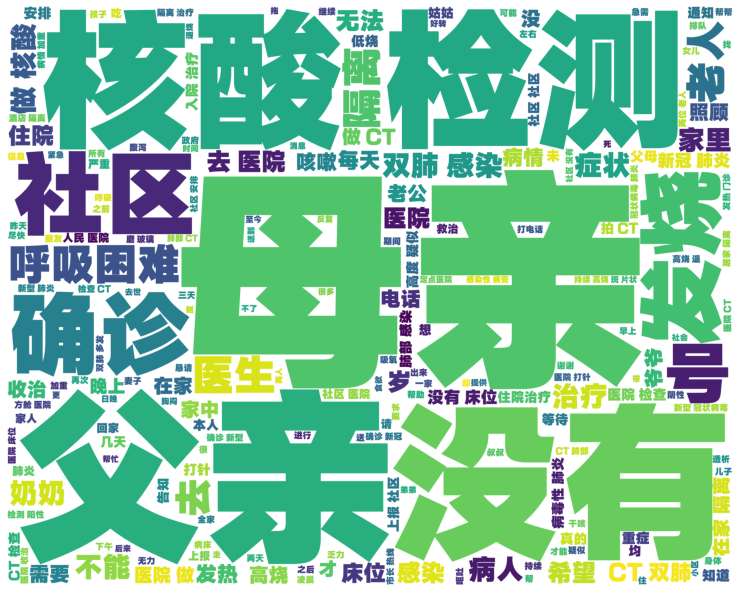

In [16]:
from wordcloud import WordCloud,STOPWORDS
def draw_wordcloud (words, color = 'white'):
    wordcloud = WordCloud(
        font_path="HYQiHei-105.ttf",
        background_color=color,
        width=2500,
        height=2000).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
words = ' '.join(df['tokens'])
draw_wordcloud (words)

## 通过引入新的数据，进一步得到更多的发现

### 引入从链家网获取的武汉市小区信息数据

In [17]:
lianjia = pd.read_excel('./lianjia.xlsx')
lianjia.head()

,xiaoqu,quyu,jiedao,year,deals,peitao,est_price
0,洪山区 027社区,洪山,老南湖,2008,90天成交8套 |9套正在出租,近地铁7号线瑞安街站,18869
1,黄陂区 08经典,黄陂,盘龙城,2010,90天成交1套 |2套正在出租,NaN,12231
2,硚口区 2008城市花园,硚口,长丰常码头,2007,90天成交0套 |0套正在出租,NaN,13682
3,武昌区 2008新长江广场,武昌,积玉桥,2005,90天成交0套 |0套正在出租,近地铁2号线螃蟹岬站,22585
4,青山区 20街坊,青山,青山,1987,90天成交0套 |0套正在出租,NaN,17574


### 问题5：求助者所在小区的房价是否与武汉市整体的房价存在显著差异？

Text(0.5, 1.0, 'Overall')

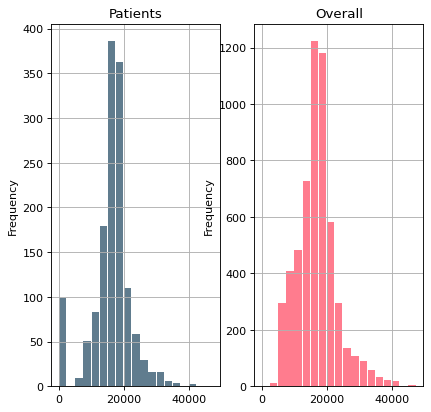

In [18]:
plt.figure(figsize=(6,6),dpi=80)
bs=range(0,50000,2500)

plt.figure(1)
ax1 = plt.subplot(121)
patients['est_price'].plot.hist(grid=True, bins=bs, rwidth=0.9, color='#607c8e')
plt.title('Patients')
    
ax1 = plt.subplot(122)
lianjia['est_price'].plot.hist(grid=True, bins=bs, rwidth=0.9, color='#ff7c8e')
plt.title('Overall')

### 问题6：求助者所在的小区距离最近的新冠定点医院/发热门诊有多远？
* 注意：这里仅考虑2020年2月初的定点医院/发热门诊，在此之后上述医院的数量有了显著增加。

In [19]:
hosp = pd.read_excel('./hospital_distance.xlsx')
hosp.head()

,loc,nearest_hospital,hospital_distance
0,东湖高新区 万科嘉园光谷的光,华中科技大学同济医学院附属同济医院（光谷院区）,3727
1,东湖高新区 东湖御院,湖北省荣军医院,1301
2,东湖高新区 云顶居,武汉市第三医院光谷院区,3772
3,东湖高新区 保利时代,武汉市第三医院光谷院区,1441
4,东湖高新区 保利花园,武汉市第三医院光谷院区,703


* 通过pandas的join函数连接其他的表格

In [20]:
joint_table = patients.set_index('loc').join(hosp.set_index('loc'))
joint_table = joint_table.dropna(subset=['hospital_distance','quyu'])
joint_table

,name,age,city,jiedao,quyu,year,est_price,biaoti,quanwen,nearest_hospital,hospital_distance
loc,,,,,,,,,,,
东湖高新区 万科嘉园光谷的光,419,54.0,湖北武汉,华科大,东湖高新,2007.0,20192.0,卵巢肿瘤晚期，春节前已完成一个疗程的化疗?,NaN,华中科技大学同济医学院附属同济医院（光谷院区）,3727.0
东湖高新区 东湖御院,218,74.0,武汉市洪山区,光谷广场,东湖高新,2015.0,25957.0,为肾衰透析病人，原透析医院为湖北省中医院光谷院区，1月31日有发?,NaN,湖北省荣军医院,1301.0
东湖高新区 云顶居,1240,52.0,武汉,民族大道,东湖高新,2003.0,17310.0,，51岁，9个月前肾移植时有肺部并发症。冬季流感多发，1月15日发烧，吃?,，51岁，9个月前同济肾移植时有肺部并发症。冬季流感多发，1月15日发烧，按主治医生要求吃感...,武汉市第三医院光谷院区,3772.0
东湖高新区 保利时代,1201,32.0,湖北省武汉市,民族大道,东湖高新,2013.0,27014.0,，36岁，华中科技大学电信系04级校友，华为武研所的员工。他是我?,，36岁，华中科技大学电信系04级校友，华为武研所的员工。他是我大学最好的朋友，在我的认识里...,武汉市第三医院光谷院区,1441.0
东湖高新区 保利时代,974,64.0,湖北省武汉市,民族大道,东湖高新,2013.0,27014.0,我亲哥哥在，目前持续高烧不退，呼吸困难?,我亲哥哥在，目前持续高烧不退，呼吸困难，三天无法进食，2月5日CT显示已双肺感染，有毛玻璃状...,武汉市第三医院光谷院区,1441.0
...,...,...,...,...,...,...,...,...,...,...,...
黄陂区 盛和小区,978,32.0,武汉,NIL,黄陂,2004.0,0.0,我哥哥常年在工作，今年于1月17号从回到，在呆到23号回了黄?,NaN,武汉市黄陂区中医医院,965.0
黄陂区 盛和小区,224,37.0,武汉,前川,黄陂,2004.0,0.0,持续高烧?,NaN,武汉市黄陂区中医医院,965.0
黄陂区 盛和小区,409,NIL,武汉,前川,黄陂,2004.0,0.0,持续高烧?,NaN,武汉市黄陂区中医医院,965.0


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
['dong-hu-gao-xin', 'jiang-xia-qu', 'cai-dian', 'dong-xi-hu', 'han-yang', 'hong-shan', 'xin-zhou', 'wu-chang', 'qiao-kou', 'han-nan', 'jiang-xia', 'jiang-an', 'jiang-han', 'dun-kou-kai-fa-qu', 'qing-shan', 'huang-pi']
                   <1km  1-2km  2-3km  >=3km
dong-hu-gao-xin      12     18     10     18
jiang-xia-qu          0      0      2      0
cai-dian              0      2      0      3
dong-xi-hu            3      0      7     26
han-yang             28     77     51     40
hong-shan            16     43     55     96
xin-zhou              0      0      0      1
wu-chang             61     88     38      6
qiao-kou             69     17      4    117
han-nan               0      0      0      1
jiang-xia             0      2      0      4
jiang-an             68     57     35     67
jiang-han            35     22     11     15
dun-kou-ka

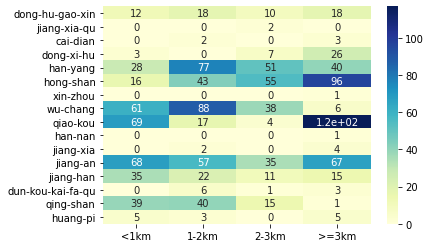

In [21]:
! pip3 install pypinyin

import matplotlib
import pypinyin
from pypinyin import lazy_pinyin

qylist = joint_table['quyu'].unique()
dists = [0,1000,2000,3000,100000]

data = []
for j in range(len(qylist)):
    item = []
    for i in range(len(dists)-1):
        num = len(joint_table.loc[(joint_table.hospital_distance >= dists[i]) & (joint_table.hospital_distance < dists[i+1]) & \
                     (joint_table.quyu == qylist[j])])
        item.append(num)
    data.append(item)
qylist = ['-'.join(lazy_pinyin(qy)) for qy in qylist]
print(qylist)

inds=qylist
cols = ['<1km','1-2km','2-3km','>=3km']
hdf = pd.DataFrame(data, columns = cols, index=inds)
print(hdf)

sns_plot = sns.heatmap(hdf,annot=True,cmap='YlGnBu')

## 思考：你还能从什么角度分析？

此处为自选角度，利用已有数据或者自行补充的数据进行分析并且得出结论